5703 nodes, 8418 edges.
896 nodes, 8418 edges.


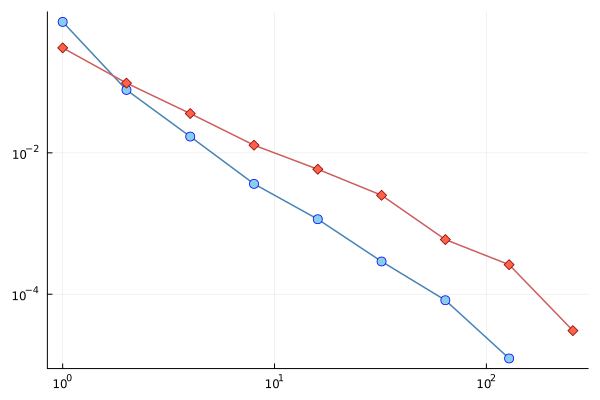

In [1]:
include("../icrp.jl")
include("../icrp_plots.jl")
include("../utils.jl")
using Serialization

In, coag_In, params_true = deserialize("synthetic.data")
println("$(length(In.nodes)) nodes, $(length(In.edge_lengths)) edges.")
println("$(length(coag_In.nodes)) nodes, $(length(coag_In.edge_lengths)) edges.")
plot_fof(In.degrees; colorset="blue")
plot_fof(coag_In.degrees; colorset="red", redraw=true)

In [2]:
num_chains = 3
chains = Vector{ICRPChain}(undef, 0)
coag_chains = Vector{ICRPChain}(undef, 0)
preds = Vector{ICRPPred}(undef, 0)
coag_preds = Vector{ICRPPred}(undef, 0)
for i in 1:num_chains
    chain, pred, coag_chain, coag_pred = deserialize("results/icrp/run$i.data")
    push!(chains, chain)
    push!(coag_chains, coag_chain)
    push!(preds, pred)
    push!(coag_preds, coag_pred)
end

In [3]:
mkpath("figures/icrp")
true_vals = Dict{String,Float64}("α"=>params_true["α"], "θ"=>params_true["θ"]+params_true["m"])
latex_codes = Dict{String,String}("α"=>"\\alpha", "θ"=>"\\theta+m")
p = plot_chain(chains; true_vals=true_vals, latex_codes=latex_codes)
savefig(p, "figures/icrp/chains.pdf")

"c:\\workspace\\codes\\julia\\icrp.jl\\synthetic\\figures\\icrp\\chains.pdf"

In [4]:
p = plot_predictions(In, preds)
savefig(p, "figures/icrp/preds.pdf")

Number of nodes RMSE: 474.5742
Number of edges RMSE: 88.1626
Degree dist average KS: 0.0111+-0.0054


"c:\\workspace\\codes\\julia\\icrp.jl\\synthetic\\figures\\icrp\\preds.pdf"

In [4]:
true_vals = Dict{String,Float64}("α"=>params_true["β"], "θ"=>params_true["θ"])
latex_codes = Dict{String,String}("α"=>"\\beta")
p = plot_chain(coag_chains; true_vals=true_vals, latex_codes=latex_codes)
savefig(p, "figures/icrp/coag_chains.pdf")

"c:\\workspace\\codes\\julia\\icrp.jl\\synthetic\\figures\\icrp\\coag_chains.pdf"

In [5]:
p = plot_predictions(coag_In, coag_preds)
savefig(p, "figures/icrp/coag_preds.pdf")

Number of nodes RMSE: 135.1164
Number of edges RMSE: 86.8058
Degree dist average KS: 0.0772+-0.0453


"c:\\workspace\\codes\\julia\\icrp.jl\\synthetic\\figures\\icrp\\coag_preds.pdf"